In [1]:
from src.model import PyTradeShifts
from src.postprocessing import Postprocessing
import country_converter as coco
import pandas as pd
import os
os.chdir('../../')
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts


In [2]:
LoI_data = pd.read_csv("data/scenario_files/losing_industry/Wheat2mean_values.csv")
print("The yield reduction globally for global catastrophic infrastructure is: ", LoI_data["mean_value"].median())
print("This considers n = ", len(LoI_data), " countries")

The yield reduction globally for global catastrophic infrastructure is:  -33.96857678890228
This considers n =  94  countries


In [3]:
NW_data = pd.read_csv("data/scenario_files/nuclear_winter/xia_37tg_y3_swheat.csv")
print("The yield reduction globally for nuclear winter is: ", NW_data["37tg"].median())
print("This considers n = ", len(NW_data), " countries")

The yield reduction globally for nuclear winter is:  -27.91
This considers n =  123  countries


In [4]:
base_year = 2022
Wheat_base = PyTradeShifts(
    "Wheat",
    base_year=base_year,
    region="Global",
    testing=False,
    cd_kwargs={"seed": 2},
    make_plot=False,
    calculate_reduced_production=True
)
loss_of_industry = PyTradeShifts(
    crop="Wheat",
    base_year=base_year,
    scenario_file_name="losing_industry/Wheat2mean_values.csv",
    scenario_name="Global Catastrophic Infrastructure Loss",
    cd_kwargs={"seed": 2},
    make_plot=False,
    calculate_reduced_production=True
)
asrs = PyTradeShifts(
    crop="Wheat",
    base_year=base_year,
    scenario_file_name="nuclear_winter/xia_37tg_y3_swheat.csv",
    scenario_name="Abrupt Sunlight Reduction Scenario",
    cd_kwargs={"seed": 2},
    make_plot=False,
    calculate_reduced_production=True
)

Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Removed countries: ['South Sudan']
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Built trade graph.
Found 6 trade communities.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Removed countries: ['South Sudan']
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario Global Catastrophic Infrastructure Loss.
Built trade graph.
Found 6 trade communities.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Removed countries: ['South Sudan']
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario Abrupt Sunlight Reduction Scenario.
Built trade graph.
Found 7 trade communities.


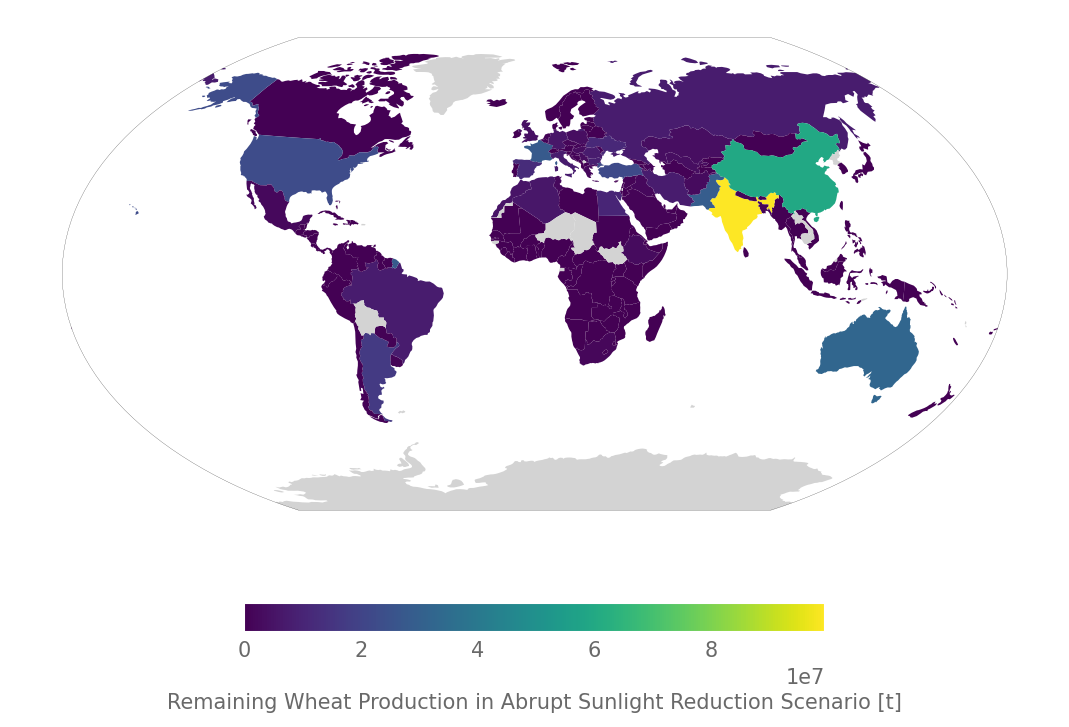

In [5]:
asrs.plot_reduced_production()

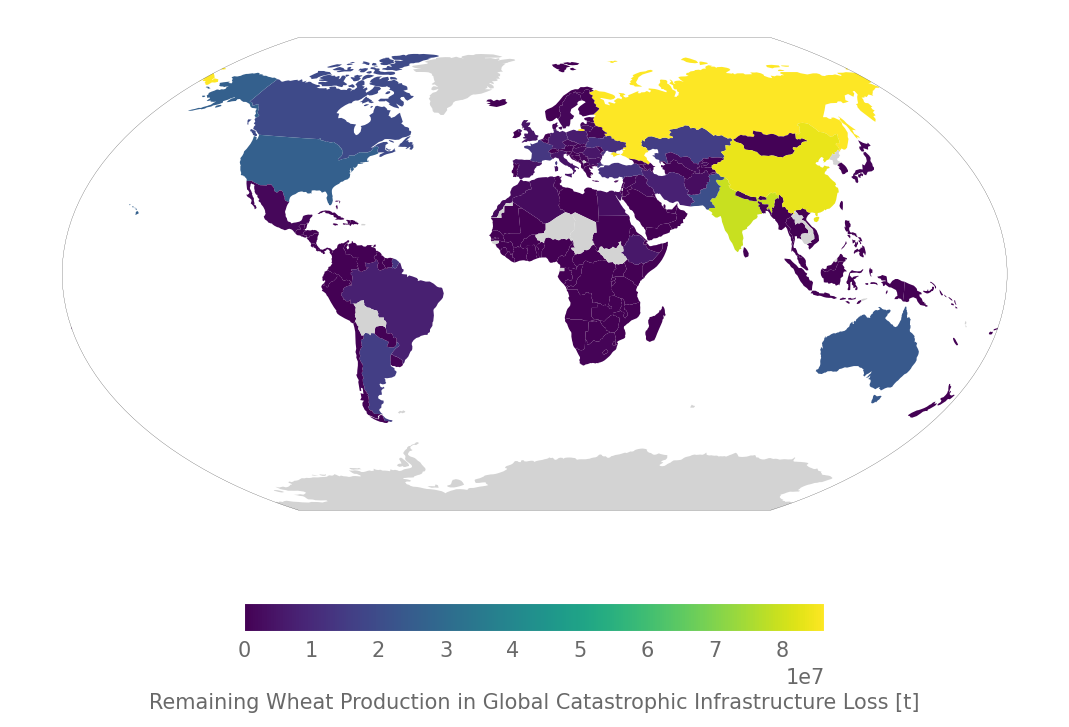

In [6]:
loss_of_industry.plot_reduced_production()